In [9]:
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
#import urllib2.request,base64
#import cPickle as pickle
from collections import Counter
import scipy as sp
import os
import os.path
import cv2
import re
from sklearn import neighbors, datasets,linear_model,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.feature_extraction import image
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from time import time
%matplotlib inline

### Preprocessing (Extraction etc.)

In [10]:
imgs_dir = os.getcwd()+'/centered'
#pattern = re.compile(".leftlight.pgm",".surprised.pgm")
images_list=list()
for filename in os.listdir(imgs_dir):
    if ".leftlight.pgm" in filename or ".rightlight.pgm" in filename or ".glasses.pgm" in filename:
        continue
    image=cv2.imread(imgs_dir+'/'+filename,0)
    h,w = image.shape
    dimensions=h*w
    image_flatten = image.flatten()
    images_list.append(image_flatten)

images_list=np.array(images_list)

print ("Dataset consists of %d faces, each dimension %d" % (len(images_list) , len(images_list[0])))

print(images_list.shape)

# save images as pickle
with open('images.pickle','wb') as file:
    pickle.dump(images_list, file)
    
sp.io.savemat('/Users/claire/Documents/magistrale/cognitive_modelling/project/images.mat', mdict={'images': images_list})

#images_list_mean=np.mean(images_list, axis=0)
#images_list_std=np.std(images_list, axis=0)
#np.seterr(divide='ignore', invalid='ignore')
#images_list_sta=(images_list-images_list_mean)/images_list_std
#print images_list_sta

Dataset consists of 120 faces, each dimension 45045
(120, 45045)


In [11]:
n_components=30
estimators = [
    ('PCA',
     decomposition.PCA(n_components=n_components, svd_solver='auto',
                       whiten=True),
     True),

    ('ICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),
]

pcas_dict=dict()
icas_dict=dict()
for name, estimator, center in estimators:
    print("\n\nExtracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = images_list
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
        
        print ("First {} principle components given by {} : {}".format(n_components,name, components_))
        if name=='PCA':
            pcas_dict[name]=components_
            variance_explained_ = estimator.explained_variance_ratio_
            pca_transform= estimator.transform(data)
            pcas_dict['variance explained']=variance_explained_
            pcas_dict['transform']=pca_transform
            pcas_dict['estimator']=estimator
            print ("Variance Explained by {} principle components given by {} : {}".format(n_components,name, sum(variance_explained_)*100))
        
        else:
            icas_dict[name]=components_
    



Extracting the top 30 PCA...
done in 0.537s
First 30 principle components given by PCA : [[-0.00051567 -0.00052531 -0.00048011 ..., -0.00437604 -0.0044736
  -0.00415373]
 [ 0.00051949  0.00050999  0.00055161 ..., -0.001      -0.00145184
  -0.00166991]
 [ 0.00018442  0.00019244  0.00015598 ..., -0.00264947 -0.0024346
  -0.0020243 ]
 ..., 
 [-0.00141647 -0.00155645 -0.00088442 ..., -0.00422147 -0.00317667
  -0.00165702]
 [ 0.00126054  0.00127213  0.00122182 ..., -0.0027465  -0.00398173
  -0.00471594]
 [-0.00211953 -0.00207161 -0.0023085  ...,  0.00254709  0.00355973
   0.00302924]]
Variance Explained by 30 principle components given by PCA : 88.39365065140294


Extracting the top 30 ICA...
done in 0.308s
First 30 principle components given by ICA : [[  1.85262424e-07   1.86273436e-07   1.81863140e-07 ...,  -7.07182461e-07
   -7.42604899e-07  -7.48339806e-07]
 [  6.83143700e-08   6.45282586e-08   8.22987989e-08 ...,  -1.79040642e-07
   -1.08717847e-07  -7.45225959e-08]
 [ -1.20507695e-0

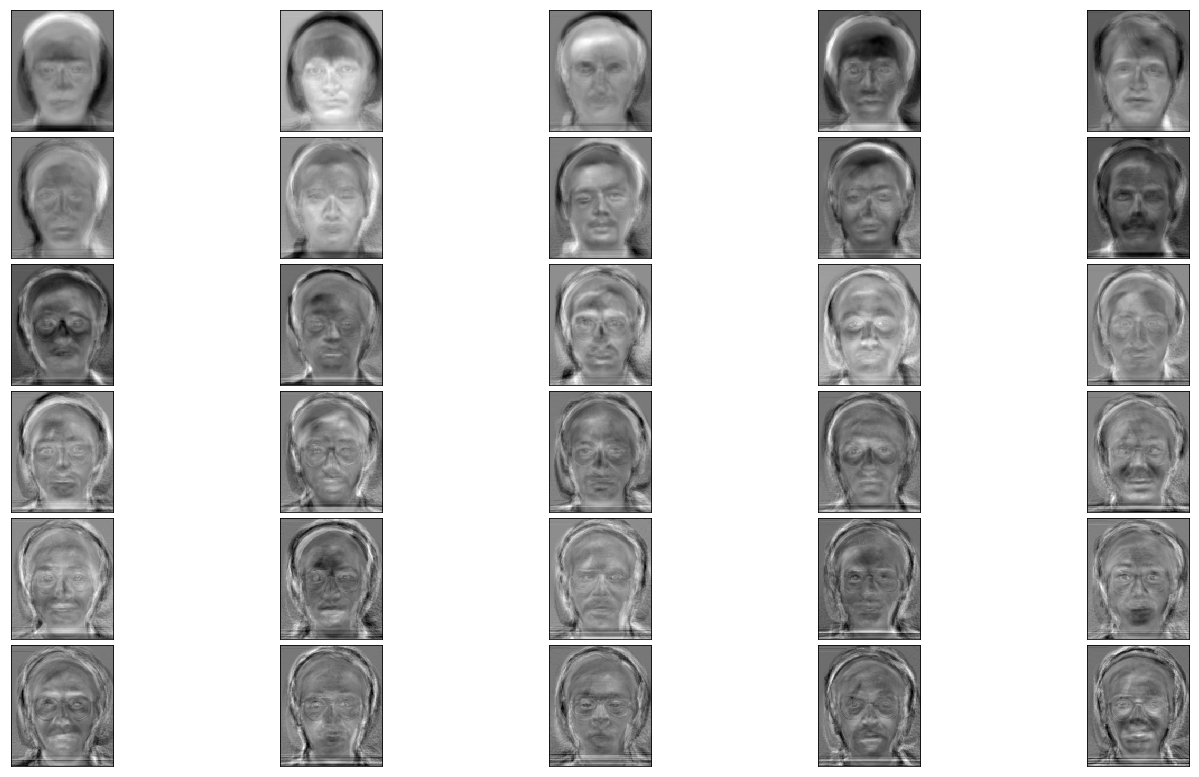

In [12]:
fig = plt.figure() 
fig.set_size_inches(18.5, 10.5, forward=True)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(30): 
    ax = fig.add_subplot(6, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pcas_dict['PCA'][i], (h,w)), cmap=plt.cm.gray, interpolation='nearest') 

First 40 Reconstruct usign first 30 PCs images 



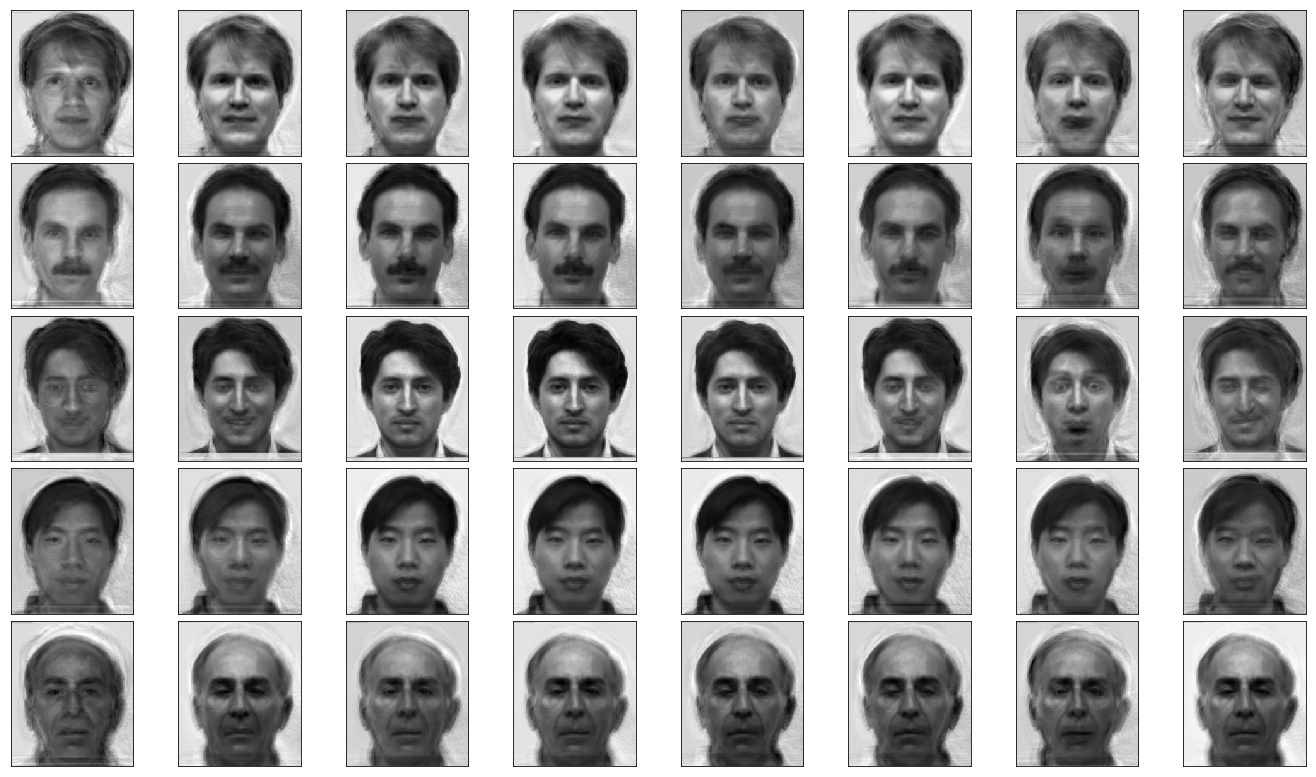

In [13]:
fig_pca = plt.figure(1) 
fig_pca.set_size_inches(18.5, 10.5, forward=True)
fig_pca.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 

print ("First 40 Reconstruct usign first 30 PCs images \n")
col=8
row=5
for i in range(40): 
    ax_pca = fig_pca.add_subplot(row, col, i+1, xticks=[], yticks=[]) 
    ax_pca.imshow(np.reshape(pcas_dict['estimator'].inverse_transform(pcas_dict['transform'][i]), (h,w)), cmap=plt.cm.gray, interpolation='nearest') 


First 40 Orginal images  



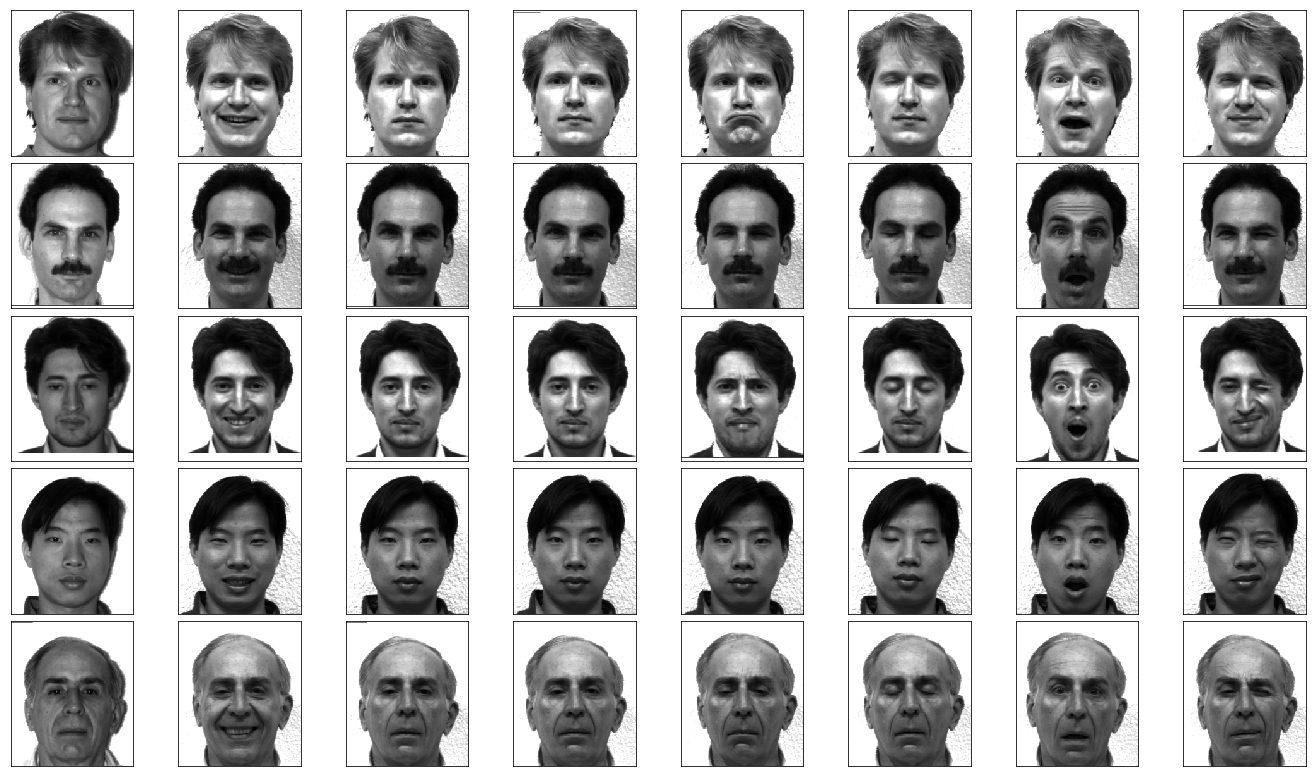

In [14]:
fig_pca = plt.figure(1) 
fig_pca.set_size_inches(18.5, 10.5, forward=True)
fig_pca.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 

print ("First 40 Orginal images  \n")
col=8
row=5
for i in range(40): 
    ax_pca = fig_pca.add_subplot(row, col, i+1, xticks=[], yticks=[]) 
    ax_pca.imshow(np.reshape(images_list[i], (h,w)), cmap=plt.cm.gray, interpolation='nearest') 
